# Lab | Data Structuring and Combining Data

## Challenge 1: Combining & Cleaning Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the links below.

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Note that you'll need to clean and format the new data.

Observation:
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [19]:
import pandas as pd

# Load all three datasets
df1 = pd.read_csv("cleaned_data_insurance.csv")
df2 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv")
df3 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv")

In [20]:
def clean_column_names(df):
    df.columns = df.columns.str.lower().str.replace(" ", "_")
    return df

df2 = clean_column_names(df2)
df3 = clean_column_names(df3)

In [21]:
# Step 2: create functions that will check skewed values and replace the missing values and remove duplicates.
def fill_missing_values(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    object_cols = df.select_dtypes(include=['object']).columns
    
    df.fillna({col: df[col].median() for col in numeric_cols}, inplace=True)
    df.fillna({col: df[col].mode()[0] for col in object_cols}, inplace=True)
    
    return df

def remove_duplicates(df):
    df.drop_duplicates(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

In [22]:
# apply functions to df2 and df3

df2 = fill_missing_values(df2)
df3 = fill_missing_values(df3)

df2 = remove_duplicates(df2)
df3 = remove_duplicates(df3)

In [23]:
#Step 3: combine the cleaned data:

combined_df = pd.concat([df1, df2, df3], ignore_index=True)

In [24]:
combined_df.to_csv("cleaned_combined_data.csv", index=False)

In [33]:
combined_df.columns

Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount', 'state'],
      dtype='object')

# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.

In [25]:
url= "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv"
marketing_df = pd.read_csv(url)

In [26]:
marketing_df = fill_missing_values(marketing_df)
marketing_df = remove_duplicates(marketing_df)

In [ ]:
# see what columns are new:

combined_df.columns 
marketing_df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [35]:
new_columns = set(marketing_df.columns) - set(combined_df.columns)
print("New Columns in marketing_df:", new_columns)


New Columns in marketing_df: {'renew_offer_type', 'employmentstatus', 'number_of_policies', 'unnamed:_0', 'months_since_policy_inception', 'vehicle_type', 'coverage', 'marital_status', 'response', 'policy', 'sales_channel', 'vehicle_size', 'months_since_last_claim', 'effective_to_date', 'location_code', 'month'}


In [41]:
for col in new_columns:
    combined_df[col] = marketing_df[col]  # Add new columns from marketing_df to combined_df


Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount', 'state',
       'renew_offer_type', 'employmentstatus', 'number_of_policies',
       'unnamed:_0', 'months_since_policy_inception', 'vehicle_type',
       'coverage', 'marital_status', 'response', 'policy', 'sales_channel',
       'vehicle_size', 'months_since_last_claim', 'effective_to_date',
       'location_code', 'month'],
      dtype='object')
['Agent' 'Call Center' 'Branch' 'Web' nan]


1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

In [44]:
print(combined_df.columns)  # Check if "sales_channel" appears
print(combined_df["sales_channel"].unique())  # Check unique values

Index(['customer', 'st', 'gender', 'education', 'customer_lifetime_value',
       'income', 'monthly_premium_auto', 'number_of_open_complaints',
       'policy_type', 'vehicle_class', 'total_claim_amount', 'state',
       'renew_offer_type', 'employmentstatus', 'number_of_policies',
       'unnamed:_0', 'months_since_policy_inception', 'vehicle_type',
       'coverage', 'marital_status', 'response', 'policy', 'sales_channel',
       'vehicle_size', 'months_since_last_claim', 'effective_to_date',
       'location_code', 'month'],
      dtype='object')
['Agent' 'Call Center' 'Branch' 'Web' nan]


In [43]:

sales_pivot = combined_df.pivot_table(
    index="sales_channel",  # Categories (branch, call center, web, mail)
    values="total_claim_amount",  # Revenue column
    aggfunc="sum"  # Summing total revenue per channel
).round(2)

print(sales_pivot)



               total_claim_amount
sales_channel                    
Agent                  1690249.79
Branch                 1216116.68
Call Center             865528.54
Web                     675574.09


C:\Users\manoe.MC_ASUS\AppData\Local\Temp\ipykernel_28904\667844863.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_pivot.index, y=sales_pivot["total_claim_amount"], palette="viridis")


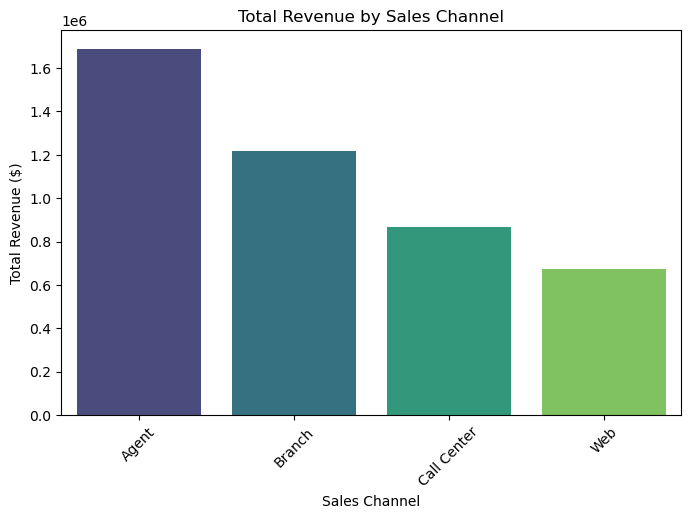

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x=sales_pivot.index, y=sales_pivot["total_claim_amount"], palette="viridis")
plt.xlabel("Sales Channel")
plt.ylabel("Total Revenue ($)")
plt.title("Total Revenue by Sales Channel")
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

In [48]:
print(combined_df["customer_lifetime_value"].dtype)


object


In [49]:
combined_df["customer_lifetime_value"] = pd.to_numeric(combined_df["customer_lifetime_value"], errors="coerce")


In [50]:
clv_pivot = combined_df.pivot_table(
    index="gender", 
    columns="education", 
    values="customer_lifetime_value", 
    aggfunc="mean"
).round(2)

print(clv_pivot)



education   Bachelor    College    Doctor  High School or Below     Master
gender                                                                    
F           98431.40  108218.22  86003.77             111026.52  121484.52
M          101966.84  106198.20  82429.30              82591.03   94862.32


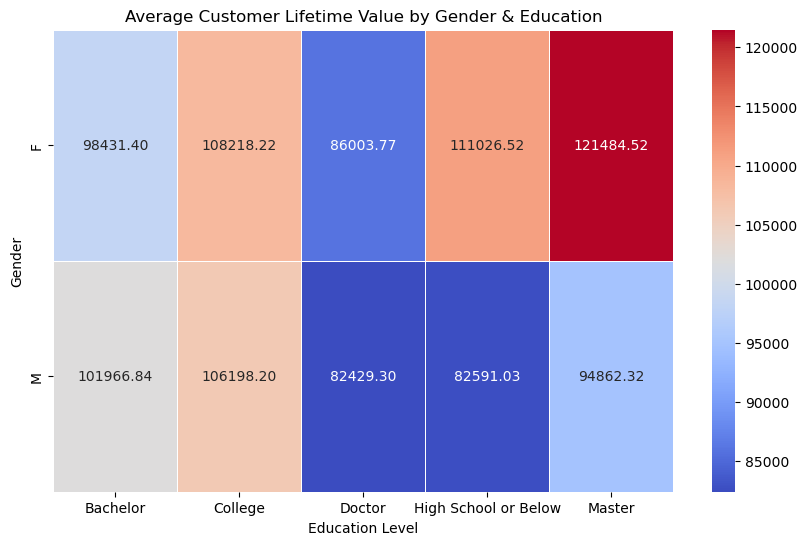

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(clv_pivot, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Average Customer Lifetime Value by Gender & Education")
plt.xlabel("Education Level")
plt.ylabel("Gender")
plt.show()


## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table.

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

In [ ]:
# Your code goes here